(512, 512, 3)
4.404571325722362e-20
2.710505431213761e-20
0.014267217045359212
0.00737140311325699


/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:660: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit(X, compute_sources=True)


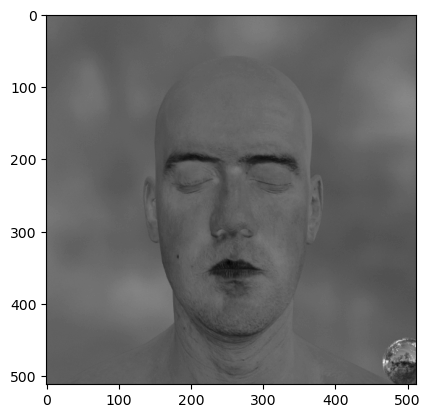

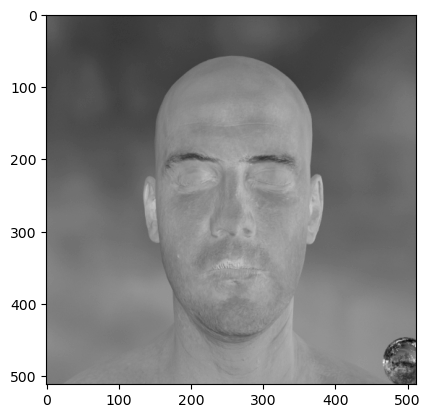

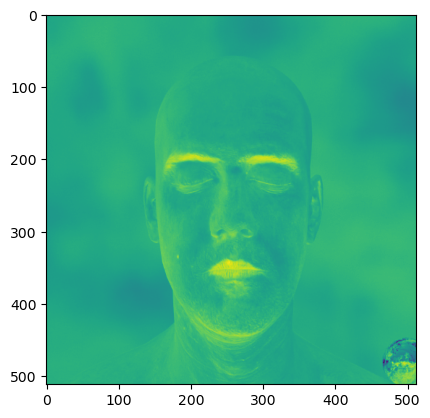

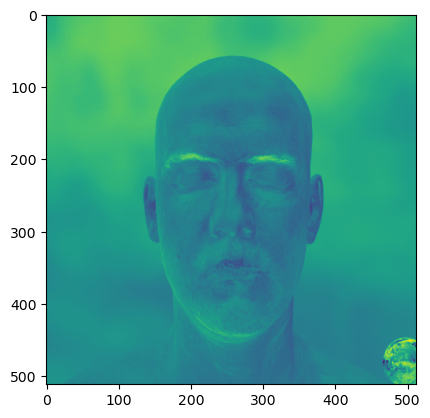

In [3]:
from sklearn.decomposition import FastICA
from skimage import color, data
import numpy as np
import matplotlib.pyplot as plt
import cv2
# !pip3 install mediapipe
#import /Users/joeljohnson/mediapipe as mp
import mediapipe as mp
# import /Users/joeljohnson/mediapipe as mp

im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture.jpg"
im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.37.16 PM.png"
im = cv2.imread(im_path)
#crop and resize to 1024x1024
im = cv2.resize(im, (512, 512))
print(im.shape)


# perform ICA
ica = FastICA(n_components=3, whiten=True, random_state=0, max_iter=1000, tol=0.0001, fun='logcosh', fun_args=None, w_init=None, algorithm='parallel')
im = im.reshape((im.shape[0] * im.shape[1], 3))
S = ica.fit_transform(im)

# separate the hemoglobin and melanin components
hemoglobin_component = S[:,0]
melanin_component = S[:,1]
hemoglobin_component = np.reshape(hemoglobin_component, (512, 512))
melanin_component = np.reshape(melanin_component, (512, 512))


# apply the mask to the image
print(np.mean(hemoglobin_component))
print(np.mean(melanin_component))
#max
print(np.max(hemoglobin_component))
print(np.max(melanin_component))





plt.imshow(hemoglobin_component, cmap='binary')
plt.show()
plt.imshow(melanin_component, cmap='binary')
plt.show()

#show rgb masks
plt.imshow(hemoglobin_component)
plt.show()
plt.imshow(melanin_component)
plt.show()

libpng warning: iCCP: known incorrect sRGB profile
/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:544: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


(512, 512, 3)
282.495474230704
-1.2789769243681803e-13
354.6948914408422
22.986116995700673


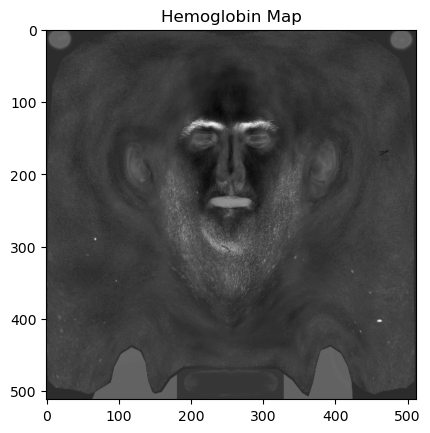

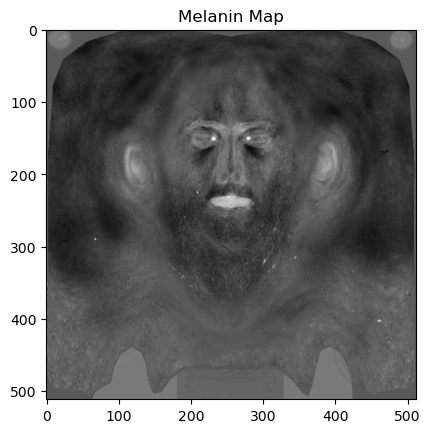

In [32]:
# from sklearn.decomposition import FastICA
# from skimage import color, data
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# import mediapipe as mp
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture.jpg"
im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.40.55 PM.png"
im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Head_02_Albedo.png"
im = cv2.imread(im_path, cv2.COLOR_BGR2RGB)
#crop and resize to 1024x1024
im = cv2.resize(im, (512, 512))
print(im.shape)


# perform ICA
ica = FastICA(n_components=3, whiten=False, random_state=0, max_iter=1000, tol=0.0001, fun_args=None, w_init=None, algorithm= 'deflation',fun='logcosh')
im = im.reshape((im.shape[0] * im.shape[1], 3))
S = ica.fit_transform(im)

# separate the hemoglobin and melanin components
hemoglobin_component = S[:,0]
melanin_component = S[:,1]
hemoglobin_component = np.reshape(hemoglobin_component, (512, 512))
melanin_component = np.reshape(melanin_component, (512, 512))

# apply the mask to the image
print(np.mean(hemoglobin_component))
print(np.mean(melanin_component))
#max
print(np.max(hemoglobin_component))
print(np.max(melanin_component))

#show rgb masks
plt.imshow(hemoglobin_component, cmap = 'binary')
plt.title('Hemoglobin Map')
plt.show()
plt.imshow(melanin_component, cmap='binary')
plt.title('Melanin Map')
plt.show()

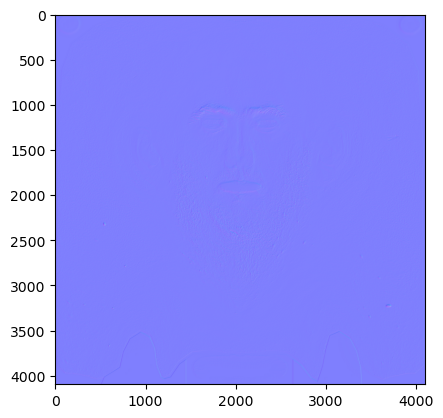

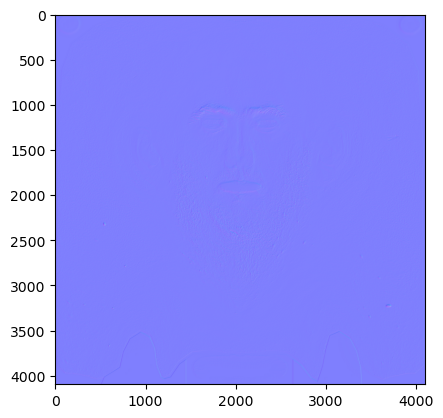

In [31]:
from PIL import Image
import argparse
import math
import numpy as np
from scipy import ndimage
from matplotlib import pyplot
from PIL import Image, ImageOps
import os
import multiprocessing as mp
import matplotlib.pyplot as plt
def GenerateNormalMap(path):
    im = Image.open(path)
    im = ImageOps.grayscale(im)
    im = np.array(im)
    im = im.astype(np.float32)
    im = im / 255.0
    im = ndimage.gaussian_filter(im, sigma=1)
    dx = ndimage.sobel(im, 0)  # horizontal derivative
    dy = ndimage.sobel(im, 1)  # vertical derivative
    dz = np.ones_like(dx)
    norm = np.sqrt(dx**2 + dy**2 + dz**2)
    dx, dy, dz = dx / norm, dy / norm, dz / norm
    dx = (dx + 1) / 2.0 
    dy = (dy + 1) / 2.0
    dz = (dz + 1) / 2.0 
    normal_map = np.dstack((dx, dy, dz))
    normal_map = (normal_map * 255).astype(np.uint8)
    return normal_map



def RGB_Get_Normal(R,G,B):
    X = (R/255.0)*2.0-1.0
    Y = (G/255.0)*2.0-1.0
    Z = (B/255.0)*2.0-1.0
    return X,Y,Z
def Normal_Get_RGB(X,Y,Z):
    R = int((X+1.0)*255.0/2.0)
    G = int((Y+1.0)*255.0/2.0)
    B = int((Z+1.0)*255.0/2.0)
    return R,G,B

# get patches with normal between +/-10 degrees
def GetPatches(min,max, image_path):
    
    # image = Image.open(image_path)
    # convert to normal map
    normalMap = GenerateNormalMap(image_path)
    normalMap = np.array(normalMap)
    # get the image size
    width, height = normalMap.size
    # get the pixel map
    pixels = Normal_Get_RGB(normalMap)
    # loop over the image
    for x in range(width):
        for y in range(height):
            # get the RGB values
            R, G, B = pixels[x, y]
            # convert to normal
            X, Y, Z = RGB_Get_Normal(R, G, B)
            # get the angle
            angle = math.degrees(math.acos(Z))
            # check the angle
            if angle < min or angle > max:
                # set to black
                pixels[x, y] = (0, 0, 0)
    # show the image
    # normalMap.show()
    return normalMap




image_path =f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/download.jpeg"
albedo_path = f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Head_02_Albedo.png"

normal_map = GenerateNormalMap(im_path)
plt.imshow(normal_map)
plt.show()

albedo_normal_map = GenerateNormalMap(albedo_path)
albedo_normal_map = albedo_normal_map
plt.imshow(albedo_normal_map)
plt.show()



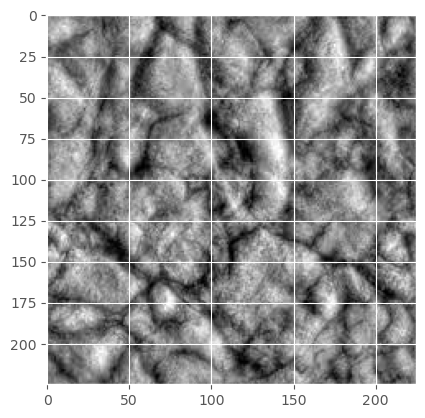

max pixel value: 255
min pixel value: 0
bump_map size: (225, 225)
row: 0
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
  10
  11
  12
  13
  14
  15
  16
  17
  18
  19
  20
  21
  22
  23
  24
  25
  26
  27
  28
  29
  30
  31
  32
  33
  34
  35
  36
  37
  38
  39
  40
  41
  42
  43
  44
  45
  46
  47
  48
  49
  50
  51
  52
  53
  54
  55
  56
  57
  58
  59
  60
  61
  62
  63
  64
  65
  66
  67
  68
  69
  70
  71
  72
  73
  74
  75
  76
  77
  78
  79
  80
  81
  82
  83
  84
  85
  86
  87
  88
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
  100
  101
  102
  103
  104
  105
  106
  107
  108
  109
  110
  111
  112
  113
  114
  115
  116
  117
  118
  119
  120
  121
  122
  123
  124
  125
  126
  127
  128
  129
  130
  131
  132
  133
  134
  135
  136
  137
  138
  139
  140
  141
  142
  143
  144
  145
  146
  147
  148
  149
  150
  151
  152
  153
  154
  155
  156
  157
  158
  159
  160
  161
  162
  163
  164
  165
  166
  167
  168
  169
  170
  171
  172

In [257]:
from PIL import Image
import numpy as np

# Open the bump map image
bump_map = Image.open(f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/download.jpeg").convert("L")

# Convert the image to a numpy array
bump_data = np.array(bump_map)

# Create an empty normal map image with the same dimensions as the bump map
normal_map = Image.new("RGB", bump_map.size)
normal_data = np.array(normal_map)

# Get the width and height of the image
width, height = bump_map.size

# Iterate over each pixel in the bump map
for x in range(width):
    for y in range(height):
        # Get the bump value of the current pixel
        bump = bump_data[x, y]
        
        # Convert the bump value to a normal vector
        normal = (bump / 255.0) * 2.0 - 1.0
        
        # Set the normal vector as the color of the corresponding pixel in the normal map
        normal_data[x, y] = (normal, normal, 255)

# Convert the normal map numpy array back to an image
normal_map = Image.fromarray(normal_data)
#show normal map
plt.imshow(bump_data, cmap='gray')
plt.show()
# Save the normal map
normal_map.save("normal_map.jpg")
print(f"max pixel value: {np.max(normal_data)}")
print(f"min pixel value: {np.min(normal_data)}")

#use autograd to get the gradient of the bump map
# !pip3 install autograd

# import autograd.numpy as np
# from autograd import grad
# from autograd import elementwise_grad
# from autograd import jacobian
# from autograd import hessian
# from autograd import value_and_grad
# from autograd import grad_and_aux

import autograd.numpy as np
from autograd import grad

# Open the bump map image
bump_map = Image.open(f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/download.jpeg").convert("L")
print(f"bump_map size: {bump_map.size}")
# Convert the image to a numpy array
bump_data = np.array(bump_map)
# Create an empty normal map image with the same dimensions as the bump map
# normal_map = []
# normal_data = []
row_grad = []
col_grad = []
# Get the width and height of the image
width, height = bump_map.size

for row in range(bump_data.shape[0]):
    col_grad
    print(f"row: {row}")
    for col in range(bump_data.shape[1]):
        print(" ",col)
        #get gradient of row
        row_g = grad(bump_data[row, col])
      
        
    # for col in range(bump_data.shape[1]):

    



-1.0 1.0 1.0


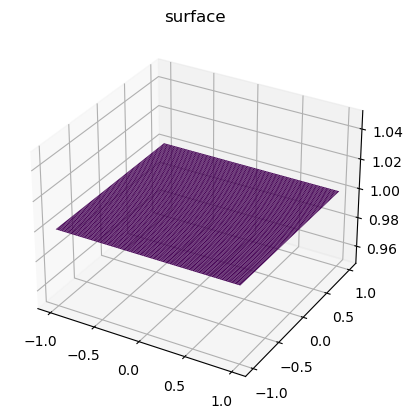

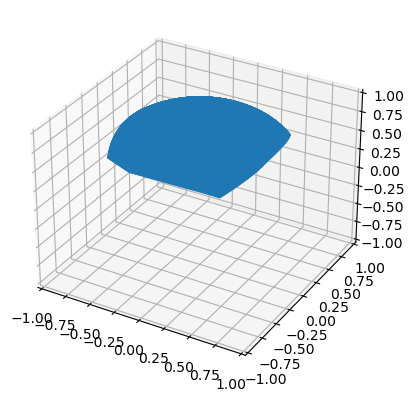

In [216]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def get_normal(pixel):
    x = (pixel[0]/255.0)*2.0-1.0
    y = (pixel[1]/255.0)*2.0-1.0
    z = (pixel[2]/255.0)*2.0-1.0
    return x,y,z

pixel = (0, 255, 255)
x,y,z = get_normal(pixel)
print(x,y,z)
#mesh of the normal map
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = np.ones_like(x)

#plot the normal map and
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')
# plt.show()


#vector plot
x = np.asarray([x])
y = np.asarray([y])
z = np.asarray([z])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()


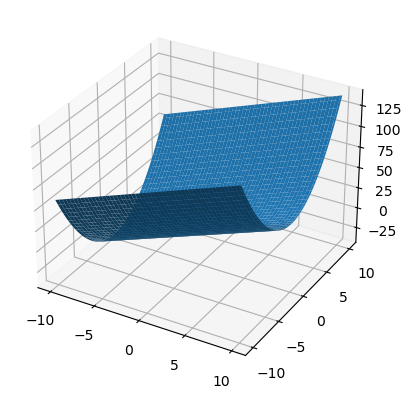

In [222]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D axis
#plot mesh and normal vectors
fig = plt.figure()

# Define x, y values
x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Define z values
Z = 4*X + Y**2

# Plot the surface
ax.plot_surface(X, Y, Z)


ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True)


# Show the plot
plt.show()




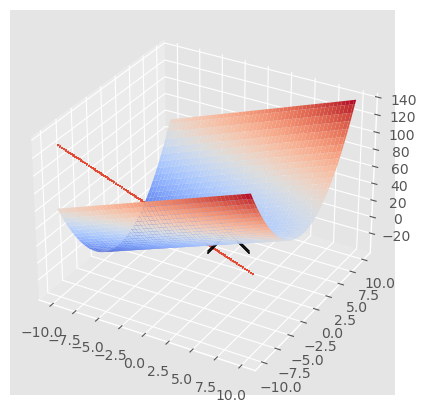

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def get_norm_vec(x,y,z):
    
plt.style.use('ggplot')

# Create a 3D axis
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Define x, y values
x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Define z values
Z = 4*X + Y**2

# Plot the surface
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

# Compute surface normal vectors
Nx = -4*np.ones_like(X)
Ny = 2*Y
Nz = np.ones_like(Z)

# Normalize normal vectors
N = np.sqrt(Nx**2 + Ny**2 + Nz**2)
Nx, Ny, Nz = Nx/N, Ny/N, Nz/N

# Plot the surface normal vectors
ax.quiver(-X[3], Y[3], Z[3], Nx, Ny, Nz, length=0.1, normalize=True, cmap=cm.coolwarm, linewidths=0.5)
ax.plot([1,1,1], [2,2,2], [1,3,1], 'kx', markersize=30)

# Show the plot
plt.show()


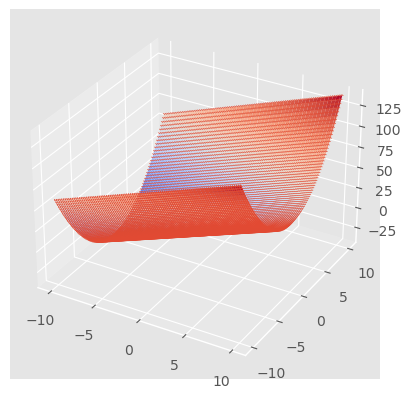